In [1]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns 
import scipy 
from scipy import stats
import random
import statsmodels
from statsmodels.graphics.factorplots import interaction_plot
import statsmodels.api as sm
from statsmodels.formula.api import ols

# Research Question:  Do Diabetes, Age and Glucose level have main effects on the Blood Pressure? 

# 1.Data Cleaning 

In [2]:
df = pd.read_csv('diabetes.csv')
df.head()

Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            6      148             72             35        0  33.6   
1            1       85             66             29        0  26.6   
2            8      183             64              0        0  23.3   
3            1       89             66             23       94  28.1   
4            0      137             40             35      168  43.1   

   DiabetesPedigreeFunction  Age  Outcome  
0                     0.627   50        1  
1                     0.351   31        0  
2                     0.672   32        1  
3                     0.167   21        0  
4                     2.288   33        1

## Step1: Check whether data follow tidy data principle 
### Tidy data principle:
### 1. Each variable must have its own column
### 2. Each observation must have its own row 
### 3. Each value must have its own cell 


In [3]:
# Check whether data follow above principle 
print('After looking into the data, the data actually follows above principle, we do not need to data cleaning from this perspective.')

After looking into the data, the data actually follows above principle, we do not need to data cleaning from this perspective.


## Step2: Check whether data has null values 

In [4]:
#Check whether has null values 
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [5]:
print('As seen in above, the data has 9 columns and 768 rows, and there is no null value.')

As seen in above, the data has 9 columns and 768 rows, and there is no null value.


## Step3: Check whether each variable has unusual values (E.g. Data error) 

In [6]:
#Check whether data has unusual/abnormal values 
df.describe()

Pregnancies     Glucose  BloodPressure  SkinThickness     Insulin  \
count   768.000000  768.000000     768.000000     768.000000  768.000000   
mean      3.845052  120.894531      69.105469      20.536458   79.799479   
std       3.369578   31.972618      19.355807      15.952218  115.244002   
min       0.000000    0.000000       0.000000       0.000000    0.000000   
25%       1.000000   99.000000      62.000000       0.000000    0.000000   
50%       3.000000  117.000000      72.000000      23.000000   30.500000   
75%       6.000000  140.250000      80.000000      32.000000  127.250000   
max      17.000000  199.000000     122.000000      99.000000  846.000000   

              BMI  DiabetesPedigreeFunction         Age     Outcome  
count  768.000000                768.000000  768.000000  768.000000  
mean    31.992578                  0.471876   33.240885    0.348958  
std      7.884160                  0.331329   11.760232    0.476951  
min      0.000000                  0.078000   21.000000    0.000000  
25%     27.300000                  0.243750   24.000000    0.000000  
50%     32.000000                  0.372500   29.000000    0.000000  
75%     36.600000                  0.626250   41.000000    1.000000  
max     67.100000                  2.420000   81.000000    1.000000

In [7]:
print("As seen in the above table, the variable Pregnancies, BloodPressure, SkinThickness, Insulin, BMI all have value  = 0.\n")
print('By our common sense, it is impossible to have value zero in the columns: BloodPressure, SkinThickness, Insulin, BMI. Thus, we need to deal with them.\n')
print("Since above variables are all numeric variables, I intend to replace those unsual values(data error) with the mean of each variable. ")

As seen in the above table, the variable Pregnancies, BloodPressure, SkinThickness, Insulin, BMI all have value  = 0.

By our common sense, it is impossible to have value zero in the columns: BloodPressure, SkinThickness, Insulin, BMI. Thus, we need to deal with them.

Since above variables are all numeric variables, I intend to replace those unsual values(data error) with the mean of each variable. 


In [8]:
print("Before filling the unusual/abnormal values with the mean, I need to check whether there exists observations which they have unsual values in all aforementioned relevant columns. \n")
print("If that is the case, then we need to directly drop that observation instead of filling values with mean.")


Before filling the unusual/abnormal values with the mean, I need to check whether there exists observations which they have unsual values in all aforementioned relevant columns. 

If that is the case, then we need to directly drop that observation instead of filling values with mean.


In [9]:
# Check whether there are unusual observations
df[(df ['Glucose']== 0) & (df ['BloodPressure']== 0) & (df ['SkinThickness']== 0) & (df ['Insulin']== 0) & (df ['BMI']== 0)]

Empty DataFrame
Columns: [Pregnancies, Glucose, BloodPressure, SkinThickness, Insulin, BMI, DiabetesPedigreeFunction, Age, Outcome]
Index: []

In [10]:
print("As seen in above, there is no such observation and we do not need to drop any rows.\n")
print('Then we process those relevant variables with replacing unsual values zero with mean.')

As seen in above, there is no such observation and we do not need to drop any rows.

Then we process those relevant variables with replacing unsual values zero with mean.


In [11]:
# replace zero values in Glucose variable with the mean 
df['Glucose'].replace(0,df['Glucose'].mean(axis=0),inplace=True)

In [12]:
# Check to ensure there is no unusual values 0 
(df ['Glucose']== 0).sum()

0

In [13]:
# replace zero values in BloodPressure variable with the mean 
df['BloodPressure'].replace(0,df['BloodPressure'].mean(axis=0),inplace=True)

In [14]:
# Check to ensure there is no unusual values 0 
(df ['BloodPressure']== 0).sum()

0

In [15]:
# replace zero values in SkinThickness variable with the mean
df['SkinThickness'].replace(0,df['SkinThickness'].mean(axis=0),inplace=True)

In [16]:
# Check to ensure there is no unusual values 0 
(df ['SkinThickness']== 0).sum()

0

In [17]:
# replace zero values in Insulin variable with the mean 
df['Insulin'].replace(0,df['Insulin'].mean(axis=0),inplace=True)

In [18]:
# Check to ensure there is no unusual values 0 
(df ['Insulin']== 0).sum()

0

In [19]:
# replace zero values in BMI variable with the mean 
df['BMI'].replace(0,df['BMI'].mean(axis=0),inplace=True)

In [20]:
# Check to ensure there is no unusual values 0 
(df ['BMI']== 0).sum()

0

In [21]:
#Glimpse tidy data 
df.head()

Pregnancies  Glucose  BloodPressure  SkinThickness     Insulin   BMI  \
0            6    148.0           72.0      35.000000   79.799479  33.6   
1            1     85.0           66.0      29.000000   79.799479  26.6   
2            8    183.0           64.0      20.536458   79.799479  23.3   
3            1     89.0           66.0      23.000000   94.000000  28.1   
4            0    137.0           40.0      35.000000  168.000000  43.1   

   DiabetesPedigreeFunction  Age  Outcome  
0                     0.627   50        1  
1                     0.351   31        0  
2                     0.672   32        1  
3                     0.167   21        0  
4                     2.288   33        1

# 2. Exploratory Data Analysis

## 2.1: The creation of categorical and dummy variables for Age, Diabetes, and Glucose Level

In [22]:
print("To faciliate latter visualization analysis, I create categorical variable 'Whether_Diabetes' to classify people as people with diabetes and people without diabetes according to the corresponding values in the 'Outcome' column. (As we know, 1 in 'Outcome' column means having diabetes and 0 in 'Outcome' column means no diabetes.)")

To faciliate latter visualization analysis, I create categorical variable 'Whether_Diabetes' to classify people as people with diabetes and people without diabetes according to the corresponding values in the 'Outcome' column. (As we know, 1 in 'Outcome' column means having diabetes and 0 in 'Outcome' column means no diabetes.)


In [23]:
# Create categorical variable to classify people as people with diabetes and people without diabetes 
df['Whether_Diabetes'] = df['Outcome'].map({1:'diabetes', 0:'no diabetes'})

In [24]:
print("To faciliate latter modeling analysis, I create another categorical variable to classfiy people into ’young people' and 'old and middle aged people'.")

To faciliate latter modeling analysis, I create another categorical variable to classfiy people into ’young people' and 'old and middle aged people'.


In [25]:
print("More specifically, I set the 30 (30 is close to the median) as boundary to classify people under 30 as young people and above 30 as middle aged and old people.\n ")
print("Then I create the dummay variable, it takes 1 when we have middle aged and old people and it takes 0 when we have young people")

More specifically, I set the 30 (30 is close to the median) as boundary to classify people under 30 as young people and above 30 as middle aged and old people.
 
Then I create the dummay variable, it takes 1 when we have middle aged and old people and it takes 0 when we have young people


In [26]:
#Create the dummy variable age_dummy to classify people under 30 as young people and people above 30 as middle-aged and old people. 
df.loc[df['Age'] >= 30, 'age_dummy'] = 1
df['age_dummy'].fillna(0, inplace = True)

In [27]:
df['age_dummy'] = df['age_dummy'].astype(int)

In [28]:
#create categorical variable called age_label to classify people under 30 as young people and people above 30 as middle-aged and old people.  
df['age_label'] = df['age_dummy'].map({1: 'Middle-aged and Old Person', 0: 'Young Person'})

In [29]:
print ("To facilitate latter modeling analysis, I create another variable to classify people's Glucose Level as low Glucose level and as high Glucose level.\n")
print("More specifically, I set the mean of Glucose as the boundary to classify people under the mean as people with low Clucose level and above the mean as people with high Clucose level.\n")
print("Then I create the dummay variable called 'glucose_dummy', it takes 1 when we have high Glucose level and it takes 0 when we have low Glucose level.")

To facilitate latter modeling analysis, I create another variable to classify people's Glucose Level as low Glucose level and as high Glucose level.

More specifically, I set the mean of Glucose as the boundary to classify people under the mean as people with low Clucose level and above the mean as people with high Clucose level.

Then I create the dummay variable called 'glucose_dummy', it takes 1 when we have high Glucose level and it takes 0 when we have low Glucose level.


In [30]:
# Create the dummy variable called glucose_dummy to classify people under the mean glucose level as low glucose level and people above mean glucose level as high glucose level 
df.loc[df['Glucose'] >= df['Glucose'].mean(), 'glucose_dummy' ] = 1
df['glucose_dummy'].fillna(0, inplace = True)
df['glucose_dummy'] = df['glucose_dummy'].astype(int)

In [31]:
# To facilitate latter visualization analysis, I create another categorical variable to classify people under the mean glucose level as low glucose level and people above mean glucose level as high glucose level
df['glucose_label'] = df['glucose_dummy'].map({1:'High Glucose', 0: 'Low Glucose'})

## 2.2 Visualization analysis - Boxplot:

Text(0.5, 0, 'Whether having diabetes')

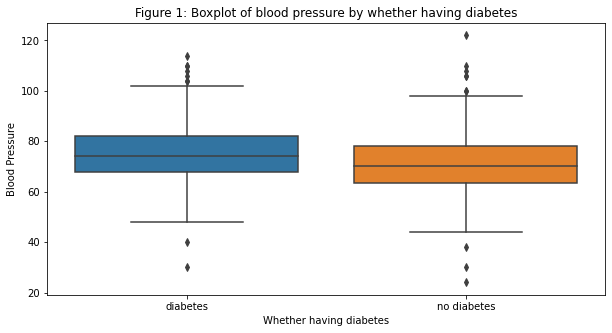

In [32]:
# Draw a boxplot of blood pressure grouped by whether having diabetes 
fig, ax = plt.subplots(figsize = (10,5))

ax = sns.boxplot(x = 'Whether_Diabetes', y = 'BloodPressure', data = df)

ax.set_title('Figure 1: Boxplot of blood pressure by whether having diabetes')
ax.set_ylabel('Blood Pressure')
ax.set_xlabel('Whether having diabetes')

Text(0, 0.5, 'Blood Pressure')

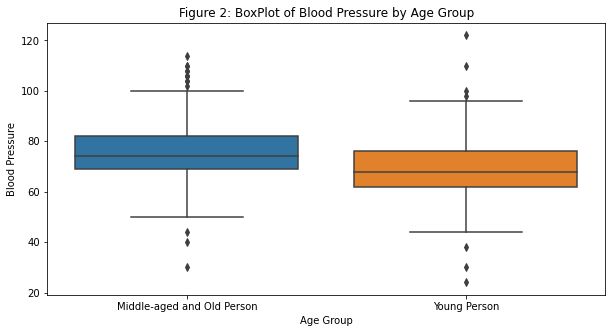

In [33]:
#Draw a boxplot of blood pressure grouped by age group
fig, ax= plt.subplots(figsize = (10,5))
fig2 = sns.boxplot(x = 'age_label', y = 'BloodPressure', data = df)
ax.set_title('Figure 2: BoxPlot of Blood Pressure by Age Group')
ax.set_xlabel('Age Group')
ax.set_ylabel('Blood Pressure')


Text(0, 0.5, 'Blood Pressure')

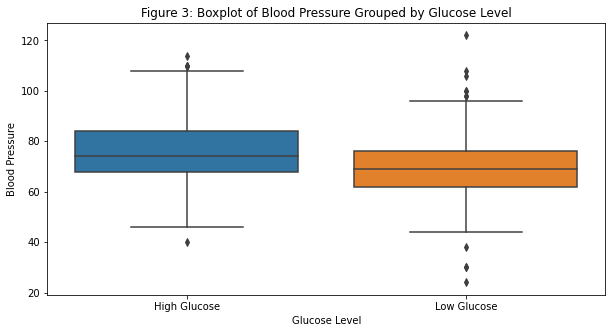

In [34]:
#Draw a boxplot of blood pressure grouped by glucose level 
fig, ax = plt.subplots(figsize = (10,5))
sns.boxplot(x = 'glucose_label', y = 'BloodPressure', data = df)
ax.set_title('Figure 3: Boxplot of Blood Pressure Grouped by Glucose Level')
ax.set_xlabel('Glucose Level')
ax.set_ylabel('Blood Pressure')

In [35]:
print("As seen in Figure 3, the mean of blood pressure among high glucose group is higher than the mean of blood pressure among low glucose group.\n")
print("Furthermore, there are a few outliers in both high glucose group and low glucose group.")

As seen in Figure 3, the mean of blood pressure among high glucose group is higher than the mean of blood pressure among low glucose group.

Furthermore, there are a few outliers in both high glucose group and low glucose group.


## 2.3 Two sample t-tests 

In [36]:
print("Besides above visulization analysis, I am also going to conduct some t-tests to further examine whether age group, glucose level and whether having diabetes have effects on the people's blood pressure.\n")
print("According to the research question, we can construct corresponding three null hypothesises. \n")
print("These three null hypothesis are:\n")
print("1. There is no difference in mean blood pressure between the people with diabetes and the people without diabetes.\n")
print("2. There is no difference in mean blood pressure between the young people and middle-aged & old people.\n")
print('3. There is no difference in mean blood pressure between the people with high glucose level and the people with low glucose level.')

Besides above visulization analysis, I am also going to conduct some t-tests to further examine whether age group, glucose level and whether having diabetes have effects on the people's blood pressure.

According to the research question, we can construct corresponding three null hypothesises. 

These three null hypothesis are:

1. There is no difference in mean blood pressure between the people with diabetes and the people without diabetes.

2. There is no difference in mean blood pressure between the young people and middle-aged & old people.

3. There is no difference in mean blood pressure between the people with high glucose level and the people with low glucose level.


In [37]:
print("In the following, I am going to test each aforementioned null hypothesis by using two sample t-test.")

In the following, I am going to test each aforementioned null hypothesis by using two sample t-test.


In [38]:
# Conduct t-test on the hypothesis about people with diabetes and people without diabetes
sample1 = df[df['Whether_Diabetes'] == 'diabetes'].BloodPressure
sample2 = df[df['Whether_Diabetes'] == 'no diabetes'].BloodPressure


tStat1, pVal1 = stats.ttest_ind(sample1,sample2,equal_var = False)

print("P-value: {0} T-statistics: {1}".format(pVal1, tStat1))

P-value: 6.2604237109435965e-06 T-statistics: 4.562333602444947


In [39]:
print("Conclusion: According to the test results, we have p value = 6.26e-06.\n ")
print("Given the significance level = 0.05, since 6.26e-06 < 0.05, we  have the evidence to reject the null hypothesis.\n")
print("We  reject the null hypothesis that there is no difference in mean blood pressue between people with diabetes and people without diabetes.")

Conclusion: According to the test results, we have p value = 6.26e-06.
 
Given the significance level = 0.05, since 6.26e-06 < 0.05, we  have the evidence to reject the null hypothesis.

We  reject the null hypothesis that there is no difference in mean blood pressue between people with diabetes and people without diabetes.


In [40]:
# Conduct t - test on the hypothesis about young people vs middle-aged & old people 
sample3 = df[df['age_label'] == 'Middle-aged and Old Person'].BloodPressure
sample4 = df[df['age_label'] == 'Young Person'].BloodPressure
tStat2, pVal2 = stats.ttest_ind(sample3,sample4,equal_var = False)

print("P-value : {0} T-statstic:{1}".format(pVal2,tStat2))

P-value : 1.7161142778309356e-16 T-statstic:8.429504465808238


In [41]:
print("Conclusion: According to the test results, we have p value = 1.716e-16.\n ")
print("Given the significance level = 0.05, since 1.716e-16 < 0.05, we have the strong evidence to reject the null hypothesis.\n")
print("The difference in mean blood pressure between young people and middle-aged & old people is statistically significant.")

Conclusion: According to the test results, we have p value = 1.716e-16.
 
Given the significance level = 0.05, since 1.716e-16 < 0.05, we have the strong evidence to reject the null hypothesis.

The difference in mean blood pressure between young people and middle-aged & old people is statistically significant.


In [42]:
# Conduct t-test on the hypothesis about high glucose group vs low glucose group 
sample5 = df[df['glucose_label'] == 'High Glucose'].BloodPressure
sample6 = df[df['glucose_label'] == 'Low Glucose'].BloodPressure
tStat3, pVal3 = stats.ttest_ind(sample5,sample6,equal_var = False)
print("P-value : {0} T-statstic:{1}".format(pVal3,tStat3))

P-value : 4.0564110170570515e-10 T-statstic:6.340185158993821


In [43]:
print("Conclusion: According to the test results, we have p value = 4.0564e-10.\n")
print("Given the significance level = 0.05, since 4.0564e-10 < 0.05, we have the strong evidence to reject the null hypothesis.\n")
print("The difference in mean blood pressure between people with high glucose level and people with low glucose level is statistically significant.")

Conclusion: According to the test results, we have p value = 4.0564e-10.

Given the significance level = 0.05, since 4.0564e-10 < 0.05, we have the strong evidence to reject the null hypothesis.

The difference in mean blood pressure between people with high glucose level and people with low glucose level is statistically significant.


## 2.4 Visualization analysis - Interaction plots 

In [44]:
print("In the following, I am going to conduct the visulization analysis on possible interaction effects")

In the following, I am going to conduct the visulization analysis on possible interaction effects


Text(0.5, 1.0, 'Figure 4: Interaction Plot of Whether Having Diabetes vs Glucose Level')

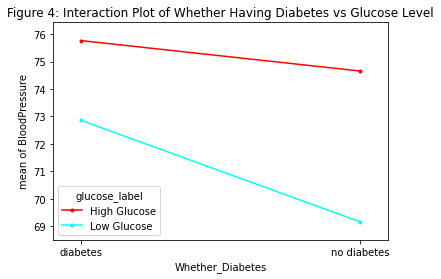

In [45]:
# Plot the interaction plot between whether having diabetes and the glucose level 
fig1 = interaction_plot(x=df['Whether_Diabetes'], trace=df['glucose_label'], response=df['BloodPressure'])
plt.title("Figure 4: Interaction Plot of Whether Having Diabetes vs Glucose Level")

In [46]:
print('As seen in Figure 4, since two lines are not parallel,it indicates that there may exist the interaction effect between Whether having diabetes and the Glucose level.')



As seen in Figure 4, since two lines are not parallel,it indicates that there may exist the interaction effect between Whether having diabetes and the Glucose level.


Text(0.5, 1.0, 'Figure 5: Interaction Plot of Whether Having Diabetes vs Age Group')

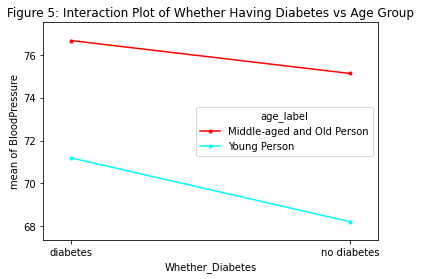

In [47]:
# plot the interaction plot between whether having diabetes and age group 
fig2 = interaction_plot (x = df['Whether_Diabetes'], trace = df['age_label'], response = df ['BloodPressure'])
plt.title("Figure 5: Interaction Plot of Whether Having Diabetes vs Age Group")

In [48]:
print ('As seen in Figure 5, since two lines are almost parallel, it indicates that there may not exist the interaction effect between whether having diabetes and age group or it is hard to detect the effect by visualizing.')

As seen in Figure 5, since two lines are almost parallel, it indicates that there may not exist the interaction effect between whether having diabetes and age group or it is hard to detect the effect by visualizing.


Text(0.5, 1.0, 'Figure 6: Interaction Plot of Glucose Level vs Age Group')

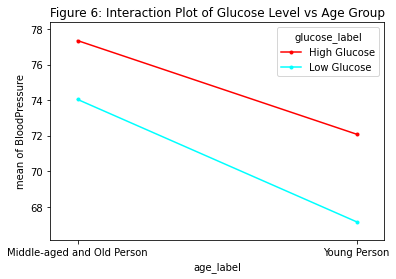

In [49]:
# plot the interaction plot between age group and glucose level 
fig3 = interaction_plot (x = df['age_label'], trace = df['glucose_label'], response = df['BloodPressure'])
plt.title('Figure 6: Interaction Plot of Glucose Level vs Age Group' )

In [50]:
print('As seen in Figure 6, since two lines are almost parallel, it indicates there may not exist the interaction effect between Age group and glucose level or it is very hard to detect this effect by visualizing.')

As seen in Figure 6, since two lines are almost parallel, it indicates there may not exist the interaction effect between Age group and glucose level or it is very hard to detect this effect by visualizing.


# 3. Modeling Analysis 

## 3.1 Logic of conducting modeling analysis 

In [51]:
print('Visualizing data only can help us explore potential effects, but cannot tell us the significance of these effects.\n')
print('To conclusively decide whether there exists the effect of whether having diabates, age group and glucose level on the blood pressure and its corresponding size, we need to fit multiple linear regression and conduct significane testing on them.')

Visualizing data only can help us explore potential effects, but cannot tell us the significance of these effects.

To conclusively decide whether there exists the effect of whether having diabates, age group and glucose level on the blood pressure and its corresponding size, we need to fit multiple linear regression and conduct significane testing on them.


## 3.2 Multiple linear regression

In [52]:
#build multiple linear regression 
model = ols('BloodPressure ~ glucose_dummy + age_dummy + Outcome + glucose_dummy:age_dummy + Outcome:glucose_dummy + Outcome:age_dummy + Outcome:age_dummy:glucose_dummy', data=df).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          BloodPressure   R-squared:                       0.115
Model:                            OLS   Adj. R-squared:                  0.107
Method:                 Least Squares   F-statistic:                     14.13
Date:                Sat, 09 Apr 2022   Prob (F-statistic):           2.62e-17
Time:                        14:14:56   Log-Likelihood:                -2958.1
No. Observations:                 768   AIC:                             5932.
Df Residuals:                     760   BIC:                             5969.
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
===================================================================================================
                                      coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------------
Intercept                          66.8575      0.745     89.707      0.000      65.394      68.321
glucose_dummy                       5.5372      1.510      3.667      0.000       2.573       8.502
age_dummy                           7.0769      1.306      5.419      0.000       4.513       9.641
Outcome                             3.1467      2.408      1.307      0.192      -1.581       7.874
glucose_dummy:age_dummy            -2.4973      2.281     -1.095      0.274      -6.975       1.980
Outcome:glucose_dummy              -3.8528      3.122     -1.234      0.218      -9.981       2.276
Outcome:age_dummy                  -2.7948      3.094     -0.903      0.367      -8.868       3.278
Outcome:age_dummy:glucose_dummy     4.0834      4.033      1.012      0.312      -3.834      12.001
==============================================================================
Omnibus:                       29.762   Durbin-Watson:                   1.898
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               67.335
Skew:                           0.175   Prob(JB):                     2.39e-15
Kurtosis:                       4.408   Cond. No.                         21.3
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [53]:
print('As seen in the summary output, the p value for glucose level (glucose_dummy) is 0.000, the p value for age group (age_dummy) is 0.000, the p value for whether having diabetes(Outcome) is 0.192.\n')
print('Given the significance level = 0.05, the p values for glucose level(glucose_dummy) and the age group (age_dummy) are all smaller than 0.05.\n')
print('It indicates that the main effect of glucose level on the blood pressure, the main effect of age group on the blood pressure are significant whereas the main effect of whether having diabetes on blood pressure is not significant.\n')
print('At the same time, we notice that all the p values for all interaction terms are larger than 0.05. This indicates all the interaction terms are insignificant.\n')
print("Thus, considering the insignificant terms, we can interpret the size of significant main effects individually, without taking consideration in those interaction terms.\n")

As seen in the summary output, the p value for glucose level (glucose_dummy) is 0.000, the p value for age group (age_dummy) is 0.000, the p value for whether having diabetes(Outcome) is 0.192.

Given the significance level = 0.05, the p values for glucose level(glucose_dummy) and the age group (age_dummy) are all smaller than 0.05.

It indicates that the main effect of glucose level on the blood pressure, the main effect of age group on the blood pressure are significant whereas the main effect of whether having diabetes on blood pressure is not significant.

At the same time, we notice that all the p values for all interaction terms are larger than 0.05. This indicates all the interaction terms are insignificant.

Thus, considering the insignificant terms, we can interpret the size of significant main effects individually, without taking consideration in those interaction terms.



In [54]:
print('Besides using the summary output to explain the significance of the variables, we can also apply the anova test on the multiple linear regression and rely on ANOVA test results to explain the significance of variables.\n')
print('In the following, I will focus on the ANOVA test results to justify the significance of variables again. (As clarified by TA, we need to focus on ANOVA test results to explain the significance of the variables even though we have used the summary output to explain it once.\n)')





Besides using the summary output to explain the significance of the variables, we can also apply the anova test on the multiple linear regression and rely on ANOVA test results to explain the significance of variables.

In the following, I will focus on the ANOVA test results to justify the significance of variables again. (As clarified by TA, we need to focus on ANOVA test results to explain the significance of the variables even though we have used the summary output to explain it once.
)


## 3.3 ANOVA test using ANOVA_lm 

In [55]:
anova_table = sm.stats.anova_lm(model, typ=2)
anova_table

sum_sq     df          F        PR(>F)
glucose_dummy                     2328.975470    1.0  17.766472  2.797828e-05
age_dummy                         6137.868938    1.0  46.822424  1.600619e-11
Outcome                             55.613076    1.0   0.424242  5.150250e-01
glucose_dummy:age_dummy             52.598973    1.0   0.401249  5.266357e-01
Outcome:glucose_dummy               66.360173    1.0   0.506225  4.769958e-01
Outcome:age_dummy                    5.122251    1.0   0.039075  8.433533e-01
Outcome:age_dummy:glucose_dummy    134.371731    1.0   1.025048  3.116468e-01
Residual                         99627.058410  760.0        NaN           NaN

In [56]:
print ("The anova_table shows the ANOVA test results.\n")
print("As seen in anova_table, the p value for glucose level (glucose_dummy) is 2.798e-05, the p value for age group (age_dummy) is 1.60e-11, the p value for whether having diabetes(Outcome) is 5.15e-01.\n")
print("Given the signicance level = 0.05, only p values for glucose level (glucose_dummy) and age group (age_dummy) are smaller than 0.05.\n")
print("Thus, we reject the null hypothesis that there is no difference in mean blood pressure between different glucose levels. Also we reject the null hypothesis that there is no difference in mean blood pressure between different age groups.\n")
print("This indicates that the main effect of glucose level on blood pressure and the main effect of age groups on blood pressure are statistically significant.\n")
print("Considering the p value for whether having diabetes are larger than 0.05, we fail to reject the corresponding null hypothesis. This indicates that the effect of whether having diabetes on blood pressure is insignificant.\n")


       
       
       
       


The anova_table shows the ANOVA test results.

As seen in anova_table, the p value for glucose level (glucose_dummy) is 2.798e-05, the p value for age group (age_dummy) is 1.60e-11, the p value for whether having diabetes(Outcome) is 5.15e-01.

Given the signicance level = 0.05, only p values for glucose level (glucose_dummy) and age group (age_dummy) are smaller than 0.05.

Thus, we reject the null hypothesis that there is no difference in mean blood pressure between different glucose levels. Also we reject the null hypothesis that there is no difference in mean blood pressure between different age groups.

This indicates that the main effect of glucose level on blood pressure and the main effect of age groups on blood pressure are statistically significant.

Considering the p value for whether having diabetes are larger than 0.05, we fail to reject the corresponding null hypothesis. This indicates that the effect of whether having diabetes on blood pressure is insignificant.



In [57]:
print("Furthermore, according to the avova_table, we can see all the p values for all interaction terms are larger than 0.05. This indicates that all interactions terms are insignificant.\n")
print("Since all interaction effects are insignificant, the insignificant interaction effects would not affect the main effects. We can interpret those significant main effects individually without taking consideration of interaction effects.\n")

Furthermore, according to the avova_table, we can see all the p values for all interaction terms are larger than 0.05. This indicates that all interactions terms are insignificant.

Since all interaction effects are insignificant, the insignificant interaction effects would not affect the main effects. We can interpret those significant main effects individually without taking consideration of interaction effects.



## 3.4 Post hoc test - Bonferroni Procedure (Bonferonni Correction)

In [58]:
print("Then we can further look into the significance of effects by conducting the post hoc test following the updated instructions.\n")

Then we can further look into the significance of effects by conducting the post hoc test following the updated instructions.



In [59]:
# fit a new model including categorical variables (not dummy variables) to facilitate latter post hoc test analysis 
model1 = ols('BloodPressure ~ glucose_label + age_label + Whether_Diabetes', data = df).fit()

In [60]:
# conduct post host test with categorical variable glucose_label 
pair_t1 = model1.t_test_pairwise('glucose_label')
pair_t1.result_frame

coef   std err         t     P>|t|  \
Low Glucose-High Glucose -3.889251  0.913052 -4.259614  0.000023   

                          Conf. Int. Low  Conf. Int. Upp.  pvalue-hs  \
Low Glucose-High Glucose        -5.68164        -2.096861   0.000023   

                          reject-hs  
Low Glucose-High Glucose       True

In [61]:
print("As seen from post hoc test result, the p value is 0.000023, which is smaller than 0.05. Thus, we conclude that the mean bloodpressure of the low glucose group is significantly different from the mean bloodpressure of the high glucose group.")



As seen from post hoc test result, the p value is 0.000023, which is smaller than 0.05. Thus, we conclude that the mean bloodpressure of the low glucose group is significantly different from the mean bloodpressure of the high glucose group.


In [62]:
# conduct post host test with categorical variable age_label 
pair_t2 = model1.t_test_pairwise('age_label')
pair_t2.result_frame

coef   std err         t  \
Young Person-Middle-aged and Old Person -6.024476  0.870384 -6.921632   

                                                P>|t|  Conf. Int. Low  \
Young Person-Middle-aged and Old Person  9.463212e-12       -7.733104   

                                         Conf. Int. Upp.     pvalue-hs  \
Young Person-Middle-aged and Old Person        -4.315849  9.463208e-12   

                                         reject-hs  
Young Person-Middle-aged and Old Person       True

In [63]:
print("As seen from post hoc test result, the p value is 9.463212e-12, which is smaller than 0.05. Thus, we conclude that the mean bloodpressure of the young people is significantly different from the mean bloodpressure of middle aged & old people.")


As seen from post hoc test result, the p value is 9.463212e-12, which is smaller than 0.05. Thus, we conclude that the mean bloodpressure of the young people is significantly different from the mean bloodpressure of middle aged & old people.


In [64]:
# conduct post host test with categorical variable Whether_Diabetes 
pair_t3 = model1.t_test_pairwise('Whether_Diabetes')
pair_t3.result_frame

coef   std err         t     P>|t|  Conf. Int. Low  \
no diabetes-diabetes -0.635248  0.972779 -0.653025  0.513937       -2.544885   

                      Conf. Int. Upp.  pvalue-hs  reject-hs  
no diabetes-diabetes         1.274388   0.513937      False

In [65]:
print("As seen from post hoc test result, the p value is 0.513937, which is larger than 0.05. Thus, we conclude that the difference in mean bloodpressure between people with diabetes and people without diabetes is insignificant.")

As seen from post hoc test result, the p value is 0.513937, which is larger than 0.05. Thus, we conclude that the difference in mean bloodpressure between people with diabetes and people without diabetes is insignificant.


## 3.5 Studies on the size of significant main effects

In [66]:
print("After identifying the existence of significant main effects of glucose levels and age groups on blood pressure, we can quantify the size of these significant main effects.\n")
print("As aforementioned, considering insignificant interaction effects, we can interpret the main effects individually and find the size of these significant main effects by directly looking at the coefficients before variables.\n")
print("Recall that I previously do the dummy coding for each variable,in this case, the coefficient before each variable is exactly the size of main effects.\n")

After identifying the existence of significant main effects of glucose levels and age groups on blood pressure, we can quantify the size of these significant main effects.

As aforementioned, considering insignificant interaction effects, we can interpret the main effects individually and find the size of these significant main effects by directly looking at the coefficients before variables.

Recall that I previously do the dummy coding for each variable,in this case, the coefficient before each variable is exactly the size of main effects.



In [67]:
print("Looking back into the summary output, the coefficient before age_dummy is 7.0769 and the coefficient before glucose_dummy is 5.5372.\n")
print("Then, this indicate the main effect of age groups on blood pressure is 7.0769 and the main effect of glucose levels on blood pressure is 5.5372.")

Looking back into the summary output, the coefficient before age_dummy is 7.0769 and the coefficient before glucose_dummy is 5.5372.

Then, this indicate the main effect of age groups on blood pressure is 7.0769 and the main effect of glucose levels on blood pressure is 5.5372.


# 4. Conclusion 

In [68]:
print("Based on above analysis, in response to the research question, we can conclude that there exists the main effect of age groups and glucose level on the blood pressure whereas there doesn't exist the main effect of whether having diabetes on blood pressure.\n")
print("The size of the main effect of age groups on blood pressure is 7.0769. The size of the main effect of glucose levels on blood pressure is 5.5372.")

Based on above analysis, in response to the research question, we can conclude that there exists the main effect of age groups and glucose level on the blood pressure whereas there doesn't exist the main effect of whether having diabetes on blood pressure.

The size of the main effect of age groups on blood pressure is 7.0769. The size of the main effect of glucose levels on blood pressure is 5.5372.


# 5 ANCOVA analysis

In [69]:
print("Besides above analysis, we also want to know after accounting and controlling for the effects of other continuous variables such as BMI, Insulin level, whether there still exists the difference in blood pressure between High Glucose group vs Low Glucose group, Young people vs Old people, Diabetes group vs No Diabetes group.")

Besides above analysis, we also want to know after accounting and controlling for the effects of other continuous variables such as BMI, Insulin level, whether there still exists the difference in blood pressure between High Glucose group vs Low Glucose group, Young people vs Old people, Diabetes group vs No Diabetes group.


In [70]:
print("Above will push the research question into a deeper and narrower step, so I will conduct the ANCOVA analysis.")

Above will push the research question into a deeper and narrower step, so I will conduct the ANCOVA analysis.


## 5.1 Exploratory data analysis 

In [71]:
print("Before conducting ACOVA analysis, I will do the summary statistics for the dependent variable bloodpressure between different levels of independent variables (Age group, Glucose, Diabetes).")

Before conducting ACOVA analysis, I will do the summary statistics for the dependent variable bloodpressure between different levels of independent variables (Age group, Glucose, Diabetes).


In [72]:
! pip install dfply 

In [73]:
from dfply import *

In [74]:
# Summary statistics for dependent variable BloodPressure 
df>>group_by(X.age_label)>>summarize(n = X['BloodPressure'].count(), mean = X['BloodPressure'].mean(), std = X['BloodPressure'].std())


age_label    n      mean        std
0  Middle-aged and Old Person  372  75.89135  11.411871
1                Young Person  396  68.83866  11.771658

In [75]:
df>>group_by(X.glucose_label)>>summarize(n = X['BloodPressure'].count(), mean = X['BloodPressure'].mean(), std = X['BloodPressure'].std())


glucose_label    n       mean        std
0  High Glucose  343  75.278050  12.104947
1   Low Glucose  425  69.814871  11.575637

In [76]:
df>>group_by(X.Whether_Diabetes)>>summarize(n = X['BloodPressure'].count(), mean = X['BloodPressure'].mean(), std = X['BloodPressure'].std())


Whether_Diabetes    n       mean        std
0         diabetes  268  74.950326  12.016572
1      no diabetes  500  70.810008  11.932269

In [77]:
print("Before conducting the ANCOVA analysis, I will conduct the visualization analysis to bettter understand the relatonship bewteen BloodPressure, BMI and three categorical variables(Glucose, Age Group, Diabetes)")

Before conducting the ANCOVA analysis, I will conduct the visualization analysis to bettter understand the relatonship bewteen BloodPressure, BMI and three categorical variables(Glucose, Age Group, Diabetes)


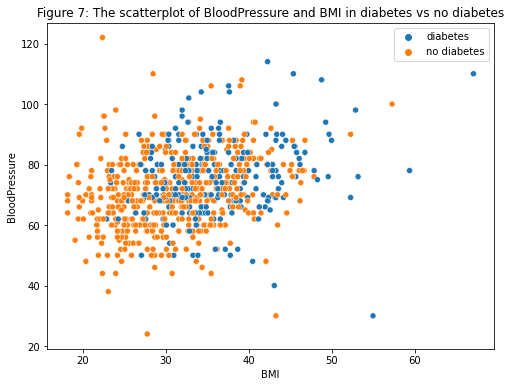

In [78]:
fig, ax = plt.subplots(figsize = (8,6))
sns.scatterplot(data = df, x = 'BMI', y = 'BloodPressure', hue = df.Whether_Diabetes.tolist())
plt.title("Figure 7: The scatterplot of BloodPressure and BMI in diabetes vs no diabetes")
plt.show()

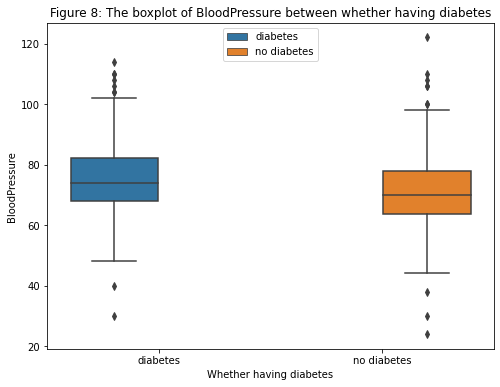

In [79]:
fig, ax = plt.subplots(figsize = (8,6))
sns.boxplot(data = df, x = 'Whether_Diabetes', y = 'BloodPressure', hue = df.Whether_Diabetes.tolist())
ax.set_xlabel( 'Whether having diabetes')
plt.title("Figure 8: The boxplot of BloodPressure between whether having diabetes")
plt.legend(loc ='upper center')
plt.show()

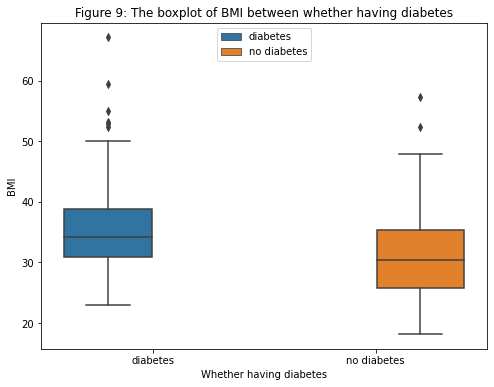

In [80]:
fig, ax = plt.subplots(figsize = (8,6))
sns.boxplot(data = df, x = 'Whether_Diabetes', y = 'BMI', hue = df.Whether_Diabetes.tolist())
ax.set_xlabel( 'Whether having diabetes')
plt.title("Figure 9: The boxplot of BMI between whether having diabetes")
plt.legend(loc ='upper center')
plt.show()

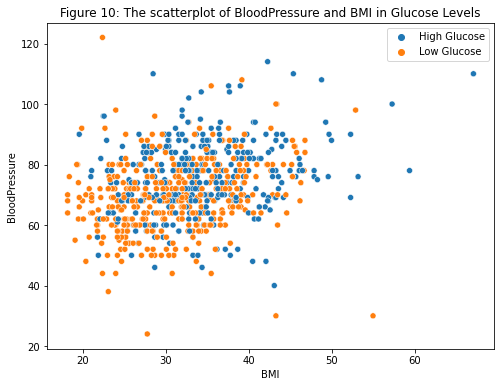

In [81]:
fig, ax = plt.subplots(figsize = (8,6))
sns.scatterplot(data = df, x = 'BMI', y = 'BloodPressure', hue = df.glucose_label.tolist())
plt.title("Figure 10: The scatterplot of BloodPressure and BMI in Glucose Levels")
plt.show()

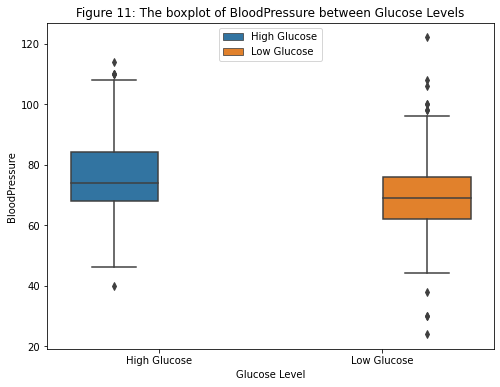

In [82]:
fig, ax = plt.subplots(figsize = (8,6))
sns.boxplot(data = df, x = 'glucose_label', y = 'BloodPressure', hue = df.glucose_label.tolist())
ax.set_xlabel( 'Glucose Level')
plt.title("Figure 11: The boxplot of BloodPressure between Glucose Levels")
plt.legend(loc ='upper center')
plt.show()

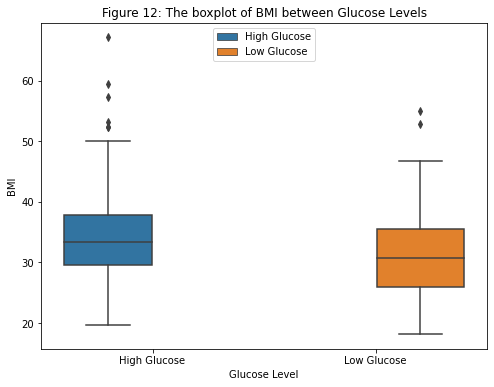

In [83]:
fig, ax = plt.subplots(figsize = (8,6))
sns.boxplot(data = df, x = 'glucose_label', y = 'BMI', hue = df.glucose_label.tolist())
ax.set_xlabel( 'Glucose Level')
plt.title("Figure 12: The boxplot of BMI between Glucose Levels")
plt.legend(loc ='upper center')
plt.show()

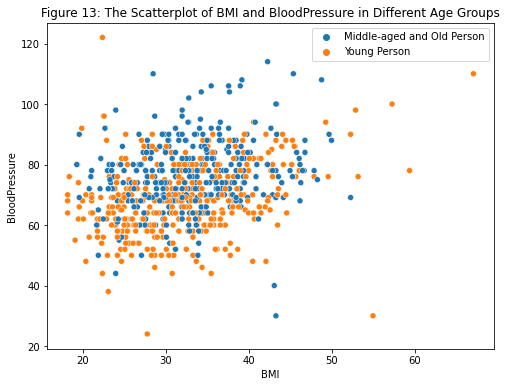

In [84]:
fig, ax = plt.subplots(figsize = (8,6))
sns.scatterplot(data = df, x = 'BMI', y = 'BloodPressure', hue = df.age_label.tolist())
plt.title("Figure 13: The Scatterplot of BMI and BloodPressure in Different Age Groups")
plt.show()

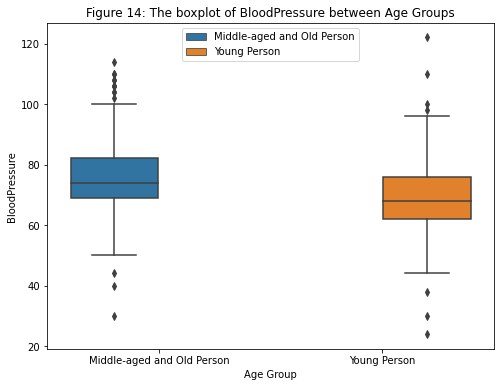

In [85]:
fig, ax = plt.subplots(figsize = (8,6))
sns.boxplot(data = df, x = 'age_label', y = 'BloodPressure', hue = df.age_label.tolist())
ax.set_xlabel( 'Age Group')
plt.title("Figure 14: The boxplot of BloodPressure between Age Groups")
plt.legend(loc ='upper center')
plt.show()

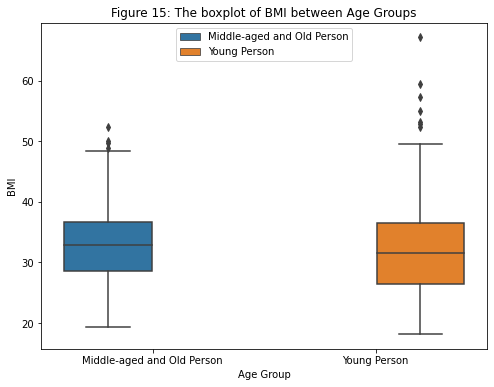

In [86]:
fig, ax = plt.subplots(figsize = (8,6))
sns.boxplot(data = df, x = 'age_label', y = 'BMI', hue = df.age_label.tolist())
ax.set_xlabel( 'Age Group')
plt.title("Figure 15: The boxplot of BMI between Age Groups")
plt.legend(loc ='upper center')
plt.show()

## 5.2 : ANCOVA analysis test results 

In [87]:
! pip install pingouin

In [88]:
from pingouin import ancova 
ancova(data = df, dv = 'BloodPressure', covar = 'BMI', between = 'age_label' )

/opt/anaconda3/lib/python3.9/site-packages/outdated/utils.py:14: OutdatedPackageWarning: The package pingouin is out of date. Your version is 0.5.0, the latest is 0.5.1.
Set the environment variable OUTDATED_IGNORE=1 to disable these warnings.
  return warn(


Source            SS   DF          F         p-unc       np2
0  age_label   8461.691770    1  67.977427  7.181824e-16  0.081608
1        BMI   7825.898542    1  62.869750  7.818430e-15  0.075942
2   Residual  95225.642807  765        NaN           NaN       NaN

In [89]:
ancova(data = df, dv = 'BloodPressure', covar = 'BMI', between = 'glucose_label')

Source             SS   DF          F         p-unc       np2
0  glucose_label    3206.940714    1  24.415804  9.540904e-07  0.030929
1            BMI    6446.817931    1  49.082368  5.386132e-12  0.060292
2       Residual  100480.393864  765        NaN           NaN       NaN

In [90]:
ancova(data = df, dv = 'BloodPressure', covar = 'BMI', between = 'Whether_Diabetes')

Source             SS   DF          F         p-unc       np2
0  Whether_Diabetes     704.952740    1   5.236710  2.238693e-02  0.006799
1               BMI    6619.032071    1  49.169183  5.166741e-12  0.060392
2          Residual  102982.381838  765        NaN           NaN       NaN

# 6. Power Analysis 

In [91]:
from statsmodels.stats.power import TTestIndPower 
effect = 0.8
alpha = 0.05 
power = 0.8 
analysis = TTestIndPower()
result = analysis.solve_power(effect, power=power, nobs1 = None, ratio = 1.0, alpha = alpha)
print('Sample Size: %.3f' % result)

Sample Size: 25.525


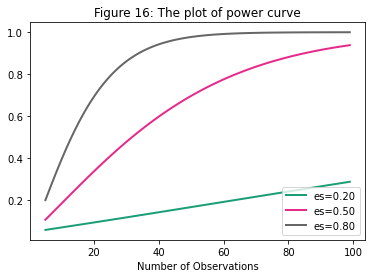

In [92]:
effect_sizes = np.array([0.2, 0.5, 0.8])
sample_sizes = np.array(range(5, 100))
analysis = TTestIndPower()
analysis.plot_power(dep_var='nobs', nobs=sample_sizes, effect_size=effect_sizes)
plt.title("Figure 16: The plot of power curve")
plt.show()